# 15장 힙

> 힙은 힙의 특성 (최소 힙 Min Heap 에서는 부모가 항상 자식보다 작거나 같다)을 만족하는 거의 완전한 트리인 특수한 트리 기반의 자료 구조이다.

힙은 트리 기반의 자료구조이다.

앞서 우선순위 큐를 사용할 때 매번 활용했던 heapq 모듈이 바로 힙으로 구현 되어 있으며, 그중에서도 파이썬에는 최소 힙만 구현되어 있다.

최소 힙은 부모가 항상 자식보다 작기 떄문에 루트가 결국 가장 작은 값을 갖게 되며,

우선순위 큐에서 가장 작은 값을 추출하는 것은 매번 힙의 루트를 가져오는 형태로 구현된다.

기반 구현을 살펴보면, 우선순위 큐 ADT 는 주로 힙으로 구현하고, 힙은 주로 배열로 구현한다.

따라서 우선순위 큐는 결국 배열로 구현하는 셈이 된다.

힙은 정렬된 구조가 아니라는 점이다.

최소 힙의 경우 부모 노드가 항상 작다는 조건만 만족할 뿐 서로 정렬 되어 있지 않다.

그 예는 아래와 같다.

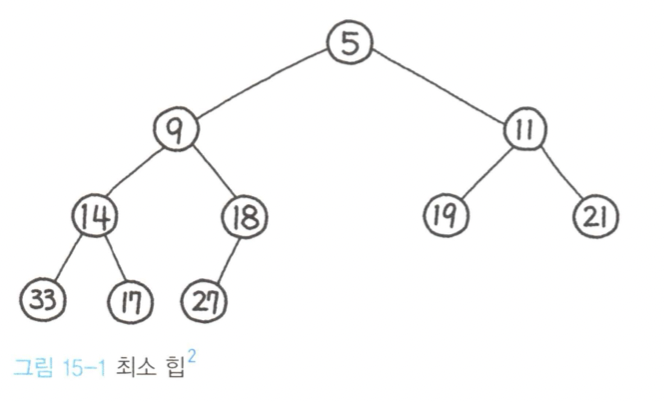

### 55. 배열의 k 번째 큰 요소

정렬되지 않은 배열에서 k번째 큰 요소를 추출하라.

- input : [3, 2, 3, 1, 2, 4, 5, 5, 6], k = 4

- output : k = 4

### 풀이 1. heapq 모듈 이용

heap 에 넣어서 k 번째 큰 수 직전까지 pop 해준 후, 최종적으로 k번째 큰 수 를 pop 하여 리턴을 해줍니다.

파이썬의 heapq 모듈은 최소 힙만을 지원하므로 힙에 넣을 때 수에 -를 붙여서 최대 힙과 비슷한 효과를 낼 수 있도록 해줍니다.

In [8]:
import heapq

def findKthLargest1(nums, k):
    heap = list()
    for n in nums:
      heapq.heappush(heap, -n) # 파이썬의 heapq 모듈은 최소 힙만 지원하므로 수에 -를 붙여 최대힙과 비슷한 효과

    for _ in range(1, k):
      heapq.heappop(heap) # 힙에 넣어 k - 1 번째 큰 수까지 pop해 준 후 

    return -heapq.heappop(heap) # 최종적으로 k번째 큰 수를 pop 하여 리턴해줍니다.

In [9]:
nums = [3,2,3,1,2,4,5,5,6]
k = 4

In [10]:
print(findKthLargest1(nums, k))

4


### 풀이 2. heapq 모듈의 heapify 이용

위에서 모든 값을 꺼내서 push 한 방법 말고, 한 번에 heapify() 하여 처리 할 수 있습니다.

heapify()란 주어진 자료구조가 힙 특성을 만족하도록 바꾸어주는 연산이며, 이 경우 파이썬의 일반적인 리스트는 힙 특성을 만족하는 리스트로 값의 위치가 변경됩니다.

물론 하나라도 값을 추가하면 다시 힙 특성이 깨지지만, 추가가 계속 일어나는 형태가 아니기 때문에

heapify()는 한 번만 해도 충분합니다.

In [14]:
def findKthLargest2(nums, k):
    heapq.heapify(nums) # 리스트 자체에 heapify 연산을 적용하여 힙으로 만들어줍니다.

    for _ in range(len(nums) - k):
        heapq.heappop(nums) # pop 과정을 통해 n-k-1 번째까지 꺼내고 줍니다. 

    return heapq.heappop(nums) # 그러면 n-k번째로 작은 수가 남는데, 그 수는 곳 k 번째로 큰 수가 됩니다.

In [17]:
print(findKthLargest2(nums, k))

4


### heapq 모듈의 nlargest 이용

heapq 모듈은 강력한 기능을 많이 지원합니다.

그 중에는 N 번째 큰 값을 추출하는 기능도 있는데, 이 기능을 사용하면 전체 코드를 다음과 같이 한 줄로 처리 할 수 있습니다.

In [21]:
def findKthLargest3(nums, k):
    return heapq.nlargest(k, nums)[-1] # nlargest 라는 k번째 수를 반환해주는 함수 사용!

In [22]:
nums = [3,2,3,1,2,4,5,5,6]
k = 4

In [23]:
print(findKthLargest3(nums, k))

4


k 번째만큼 큰 값이 가장 큰 값부터 순서대로 리스트로 리턴됩니다. 여기서 마지막 인덱스 -1 이 k번째 값이 됩니다.

힙이 아니더라도 내부적으로 heapify() 함수도 호출해 처리해주기 떄문에, 별도로 힙 처리를 할 필요가 없어 편리합니다.

참고로 nsmallest()를 사용하면 동일한 방식으로 n 번째 작은 값도 추출이 가능합니다.

### 풀이 4. 정렬을 이용한 풀이

이번에는 정렬부터 한 다음, k번째 값을 추출하는 방식으로 풀이를 해보겠습니다.

추가, 삭제가 빈번할 때는 heapq를 이용한 힙 정렬이 유용하지만 이처럼 입력값이 고정되어 있을 때는 그저 한 번 정렬하는 것만으로 충분합니다.

In [24]:
def findKthLargest4(nums, k):
    nums.sort()
    return nums[-k]

In [25]:
print(findKthLargest4(nums, k))

4


In [26]:
# sorted()로 큰 값부터 역순으로 정렬하면, 좀 더 직관적인 풀이도 가능
def findKthLargest5(nums, k):
    return sorted(nums, reverse=True)[k - 1]

In [27]:
print(findKthLargest5(nums, k))

4


# 16장 트라이

> 트라이 (Trie)는 검색 트리의 일종으로 일반적으로 키가 문자열인, 동적 배열 또는 연관 배열을 저장하는 데 사용 되는 정렬된 트리 자료구조 입니다.

트라이는 실무에 매우 유용하게 쓰이는 자료구조로, NLP 분야에서 문자열 탐색을 위한 자료구조로 널리 쓰입니다.

초창기에는 트리 로 발음했으나, 기존의 트리와 구분하기 위해 오늘날에는 '트라이'라고 불립니다.

트라이는 트리와 유사하지만, 지금까지 우리가 주로 살펴본 이진 트리의 모습이 아닌 전형적인 다진 트리의 형태를 띕니다.

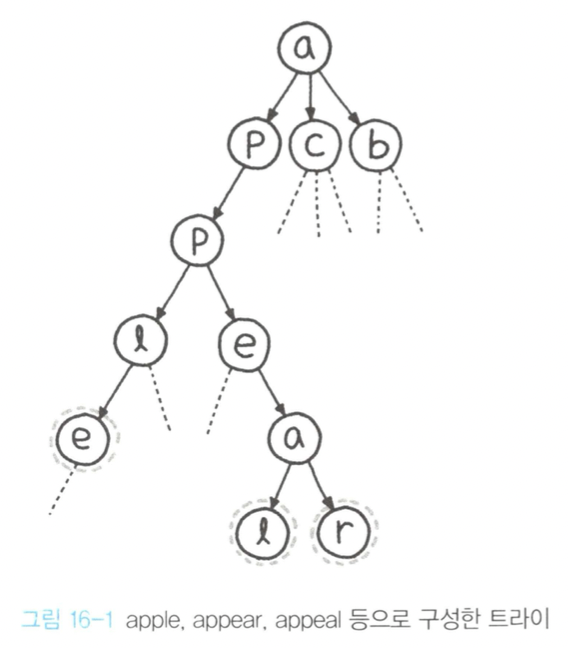

위 그림은 apple, appear, appeal 등으로 트라이를 구성한 것입니다.

여기에서 만약 apple를 찾는다면, a -> p -> p -> l -> e 까지 내려가면 단어 apple 을 찾을 수 있습니다.

이 처럼 트라이에는 각 문자열의 길이만큼만 탐색하면 원하는 결과를 찾을 수 있습니다.

트라이는 문자열을 위한 트리의 형태이기 때문에 사실상 문자 개수만큼 자식이 있어 위 그림과 같이 나타내보면 상당히 많은 자식 노드를 갖고 있는 트리임음 확인할 수 있습니다.

### 56. 트라이 구현

트라이의 insert, eearch, startsWith 메소드를 구현하라.

Trie trie = new Trie();

trie.insert("apple");  
trie.search("apple");   // returns ture  
trie.search("app");   // returns false  
trie.startsWith("app");   // returns true  
trie.insert("app");  
trie.search("app");   // returns true

### 풀이 1. 딕셔너리를 이용해 간결한 트라이 구현

트라이를 직접 구현해보는 문제입니다.

여기서는 딕셔너리를 이용해 가급적 간결한 형태롤 풀이해보겠습니다.

In [29]:
import collections


# 트라이의 노드
class TrieNode: # 자식의 문자를 key로 node 자체를 value로 갖는 딕셔너리 children을 맴버로 갑습니다.
    def __init__(self):
        self.word = False
        self.children = collections.defaultdict(TrieNode)


class Trie:
    def __init__(self):
        self.root = TrieNode()

    # 문자열로 단어를 받아 트라이에 삽입
    def insert(self, word: str) -> None:
        node = self.root
        for char in word:
            node = node.children[char] # ex) a -> p -> p -> l -> e
        node.word = True # 마지막 e가 생성되며 단어의 마무리 부분의 노드가 만들어지면 True를 만들어 줍니다.

    # 단어 존재 여부 판별
    def search(self, word: str) -> bool:
        node = self.root
        for char in word:
            if char not in node.children: # 문자 노드가 발견되지 않을 경우
                return False # False 반환
            node = node.children[char]

        return node.word

    # 문자열로 시작 단어 존재 여부 판별
    def startsWith(self, prefix: str) -> bool:
        node = self.root
        for char in prefix:
            if char not in node.children:
                return False
            node = node.children[char]

        return True

### 57. 팰린드롬 페어

단어 리스트에서 words[i] + words[j]가 팰린드롬이 되는 모든 인덱스 조합 (i, j)를 구하라.

예제 1.
- input = ["abcd", "dcba", "lls", "s", "sssll"]
- output = [[0,1], [1,0], [3,2], [2,4]]
- 설명 : [ "dcbaabcd" , "abcddcba" , "slls", "llssssll"]이 팰린드롬이다.

예제 2.
- input = ["bat" ,"tab","cat" ]
- 출력 = [[0,1], [1,0]]
- 설명 = ["battab","tabbat"]이 펠린드롬이다

### 풀이 1. 팰린드롬을 부르트 포스로 계산

In [30]:
words = ["abcd","dcba","lls","s","sssll"]

In [32]:
def palindromePairs(words):
    def is_palindrome(word):
        return word == word[::-1] # 전체를 거꾸로 가져옵니다.
    
    output = []
    for i, word1 in enumerate(words):
        for j, word2 in enumerate(words):
            if i == j:
                continue
            if is_palindrome(word1 + word2):
                output.append([i, j])
    return output

In [34]:
print(palindromePairs(words))

[[0, 1], [1, 0], [2, 4], [3, 2]]


간단하게 구현이 되고 실행도 되지만, 타임 아웃이 발생합니다.

- 부르트 포스로 연산을 하다보니, O(n^2)으로 풀이 됩니다.

### 트라이 구현



In [41]:
import collections
from typing import List


# 트라이를 저장할 노드.
class TrieNode:
    def __init__(self):
        self.children = collections.defaultdict(TrieNode)
        self.word_id = -1
        self.palindrome_word_ids = []


class Trie:
    def __init__(self):
        self.root = TrieNode()

    # 펠린드롬 판별 함수.
    @staticmethod
    def is_palindrome(word: str) -> bool:
        return word[::] == word[::-1]

    # 단어 삽입.
    def insert(self, index, word) -> None:
        node = self.root
        for i, char in enumerate(reversed(word)):
            # 두번째 로직에서 문자를 하나씩 제거해가며 팰린드롬을 판별해서 체크함, 여기 word 리스트를 잘라서 체크함 wordreverse 아님!
            if self.is_palindrome(word[0:len(word) - i]):
                node.palindrome_word_ids.append(index)
            node = node.children[char]
        node.word_id = index

    def search(self, index, word) -> List[List[int]]:
        result = []
        node = self.root

        # 여기 while 에서 node = nod.children[word[0]]으로 node 끝까지 타고 가서 밑에 판별 로직 1, 2에서 끝점이랑 비교가 가능할 수 있습니다.
        while word:
            # 판별 로직 3
            if node.word_id >= 0:
                if self.is_palindrome(word):
                    result.append([index, node.word_id])
            if not word[0] in node.children:
                return result
            node = node.children[word[0]]
            word = word[1:]

        """
        판별 로직 1 
        위쪽 while 문에서 구현된 트라이와 word가 맞을 때 까지 쭉 안으로 들어오고 
        그 지점에서 if 문이 실행됨.
        즉, 꺼꾸로 들어간 트라이와 원래의 word 값이 같은 경우에
        밑의 if문으로 걸러짐. 
        """

        if node.word_id >= 0 and node.word_id != index:
            result.append([index, node.word_id])

        """
        판별 로직 2
        위쪽 while 문에서 구현된 트라이와 word가 맞을 때 까지 쭉 안으로 들어오고
        그 지점에서 for 문이 실행됨.
        그 자리에 palindrome_word_id가 있으면 그것도 정답. 
        """
        
        for palindrome_word_id in node.palindrome_word_ids:
            result.append([index, palindrome_word_id])

        return result


class Solution:
    def palindromePairs2(self, words: List[str]) -> List[List[int]]:
        trie = Trie()

        for i, word in enumerate(words):
            trie.insert(i, word)

        results = []
        for i, word in enumerate(words):
            results.extend(trie.search(i, word))

        return results


a = Solution().palindromePairs2(['d', 'cbbcd', 'dcbb', 'dcbc', 'cbbc', 'bbcd'])
print(a)

[[0, 1], [1, 4], [2, 5], [2, 1], [3, 0], [5, 2]]
